In [0]:
from keras_preprocessing.image import ImageDataGenerator 
from __future__ import print_function, division

from keras.datasets import mnist, cifar10
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, MaxPooling2D, Embedding
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from google.colab import files
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import sys
import numpy as np

from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.nasnet import NASNetMobile

from google.colab import drive

Using TensorFlow backend.


In [0]:
# Подгрузка google-drive

from google.colab import drive
drive.mount('/content/drive1')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive1


### Подготовка данных картинок из 3х категорий

In [0]:
# Настройка test & train - генераторов для картинок
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Обучающая выборка 8ми классов
train_generator = train_datagen.flow_from_directory(
        '/content/drive1/My Drive/Neyro/Neyro/Kursovoi/8classes/Train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

# Проверочная выборка 8ми классов
validation_generator = test_datagen.flow_from_directory(
        '/content/drive1/My Drive/Neyro/Neyro/Kursovoi/8classes/Validation',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 1557 images belonging to 8 classes.
Found 80 images belonging to 8 classes.


In [0]:
classes=['Ferdinand', 'KV-2', 'Priest', 'PZ-3', 'SU-85', 'T-34', 'T-90', 'Tigre']

### Функция PLOT

In [0]:
def plotAny():
  plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_acc'], 
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()

In [0]:
input_shape = (224, 224, 3)
vgg19_my = VGG19(weights='imagenet', 
                  include_top=False,
                  input_shape = input_shape)
vgg19_my.trainable = False





80142336/80134624 [==============================] - 1s 0us/step








In [0]:
'''input_shape = (224, 224, 3)
net_my = net(weights='imagenet', 
                  include_top=False,
                  input_shape = input_shape)
net_my.trainable = False'''


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 821s 27s/step - loss: 6.5832 - acc: 0.2736 - val_loss: 5.3257 - val_acc: 0.3382
Epoch 2/10
30/30 [==============================] - 799s 27s/step - loss: 2.1530 - acc: 0.4177 - val_loss: 1.6816 - val_acc: 0.4412
Epoch 3/10
30/30 [==============================] - 774s 26s/step - loss: 1.1058 - acc: 0.6417 - val_loss: 1.2473 - val_acc: 0.6680
Epoch 4/10
30/30 [==============================] - 783s 26s/step - loss: 0.8511 - acc: 0.7316 - val_loss: 1.2117 - val_acc: 0.6471
Epoch 5/10
30/30 [==============================] - 778s 26s/step - loss: 0.8100 - acc: 0.7379 - val_loss: 1.2974 - val_acc: 0.7132
Epoch 6/10
30/30 [==============================] - 771s 26s/step - loss: 0.7122 - acc: 0.7473 - val_loss: 1.2385 - val_acc: 0.7109
Epoch 7/10
30/30 [==============================] - 792s 26s/step - loss: 0.5043 - acc: 0.8365 - val_loss: 1.2635 - val_acc: 0.7279
Epoch 8/10
30/30 [==============================] - 780s 26s/step - loss: 0.4710 - acc:

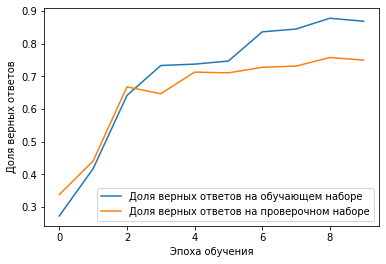

In [0]:
model = Sequential()
model.add(vgg19_my)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam", 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=30,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()

In [0]:
files.upload()

Saving Ferdinant-1.jpg to Ferdinant-1.jpg
Saving Ferdinant-2.jpg to Ferdinant-2.jpg
Saving Ferdinant-3.jpg to Ferdinant-3.jpg
Saving Ferdinant-4.jpg to Ferdinant-4.jpg
Saving Ferdinant-5.jpg to Ferdinant-5.jpg
Saving Ferdinant-6.jpg to Ferdinant-6.jpg
Saving Ferdinant-7.jpg to Ferdinant-7.jpg
Saving Ferdinant-8.jpg to Ferdinant-8.jpg


{'Ferdinant-1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x00\xaeExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x01\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\x1a\x00\x00\x00\x00\x00\x01\x92\x86\x00\x07\x00\x00\x00z\x00\x00\x00,\x00\x00\x00\x00UNICODE\x00\x00C\x00R\x00E\x00A\x00T\x00O\x00R\x00:\x00 \x00g\x00d\x00-\x00j\x00p\x00e\x00g\x00 \x00v\x001\x00.\x000\x00 \x00(\x00u\x00s\x00i\x00n\x00g\x00 \x00I\x00J\x00G\x00 \x00J\x00P\x00E\x00G\x00 \x00v\x006\x002\x00)\x00,\x00 \x00q\x00u\x00a\x00l\x00i\x00t\x00y\x00 \x00=\x00 \x009\x005\x00\n\xff\xdb\x00C\x00\x02\x01\x01\x02\x01\x01\x02\x02\x02\x02\x02\x02\x02\x02\x03\x05\x03\x03\x03\x03\x03\x06\x04\x04\x03\x05\x07\x06\x07\x07\x07\x06\x07\x07\x08\t\x0b\t\x08\x08\n\x08\x07\x07\n\r\n\n\x0b\x0c\x0c\x0c\x0c\x07\t\x0e\x0f\r\x0c\x0e\x0b\x0c\x0c\x0c\xff\xdb\x00C\x01\x02\x02\x02\x03\x03\x03\x06\x03\x03\x06\x0c\x08\x07\x08\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\

In [0]:
def predictImage():
  img = image.load_img(img_path, target_size=(224, 224))
  plt.imshow(img)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  prediction = model.predict(x)
  prediction = np.argmax(prediction)
  print("Распознанный образ: ", prediction)
  print("Название распознанного образа: ", classes[prediction])

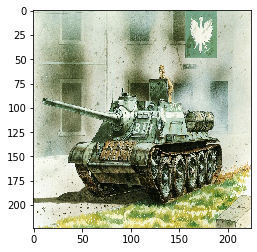

Распознанный образ:  4
Название распознанного образа:  SU-85


In [0]:
img_path = 'SU-85_2.jpg'
predictImage()

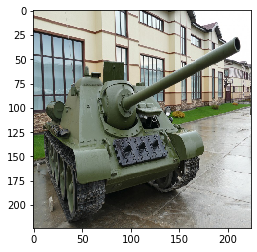

Распознанный образ:  5
Название распознанного образа:  T-34


In [0]:
img_path = 'SU-85_3.jpg'
predictImage()

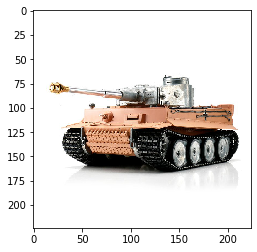

Распознанный образ:  7
Название распознанного образа:  Tigre


In [0]:
img_path = 'Tigre_1.jpg'
predictImage()

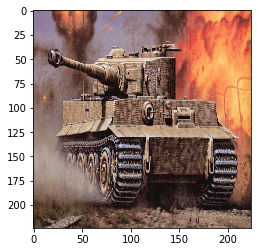

Распознанный образ:  7
Название распознанного образа:  Tigre


In [0]:
img_path = 'Tigre_5.jpg'
predictImage()

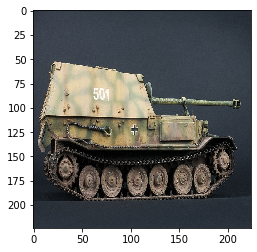

Распознанный образ:  0
Название распознанного образа:  Ferdinand


In [0]:
img_path = 'Ferdinant-1.jpg'
predictImage()

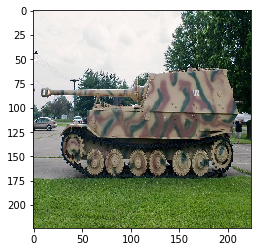

Распознанный образ:  0
Название распознанного образа:  Ferdinand


In [0]:
img_path = 'Ferdinant-2.jpg'
predictImage()

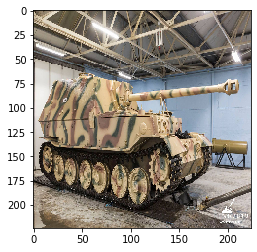

Распознанный образ:  5
Название распознанного образа:  T-34


In [0]:
img_path = 'Ferdinant-3.jpg'
predictImage()

#VGG19, меньше АДАм(увеличил дропаут)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
 3/30 [==>...........................] - ETA: 8:37 - loss: 2.6328 - acc: 0.1667

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 474s 16s/step - loss: 2.1192 - acc: 0.2105 - val_loss: 1.7807 - val_acc: 0.3824
Epoch 2/20
30/30 [==============================] - 301s 10s/step - loss: 1.6201 - acc: 0.4354 - val_loss: 1.5672 - val_acc: 0.4926
Epoch 3/20
30/30 [==============================] - 39s 1s/step - loss: 1.3123 - acc: 0.5385 - val_loss: 1.3920 - val_acc: 0.6133
Epoch 4/20
30/30 [==============================] - 35s 1s/step - loss: 1.1245 - acc: 0.6435 - val_loss: 1.2423 - val_acc: 0.6507
Epoch 5/20
30/30 [==============================] - 38s 1s/step - loss: 0.9709 - acc: 0.6915 - val_loss: 1.2161 - val_acc: 0.6544
Epoch 6/20
30/30 [==============================] - 35s 1s/step - loss: 0.8182 - acc: 0.7254 - val_loss: 1.2073 - val_acc: 0.6680
Epoch 7/20
30/30 [==============================] - 38s 1s/step - loss: 0.7618 - acc: 0.7656 - val_loss: 1.1964 - val_acc: 0.7390
Epoch 8/20
30/30 [==============================] - 38s 1s/step - loss: 0.7081 - acc: 0.7905 - va

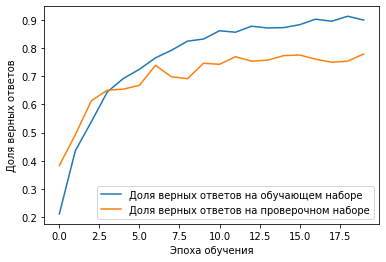

In [0]:
model = Sequential()
model.add(vgg19_my)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=30,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()

#!Увеличим Dense sloi = 512 s 0.5 dropaut

Epoch 1/20
 2/30 [=>............................] - ETA: 42s - loss: 2.3925 - acc: 0.2128 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 40s 1s/step - loss: 2.1050 - acc: 0.2684 - val_loss: 1.6145 - val_acc: 0.4559
Epoch 2/20
30/30 [==============================] - 36s 1s/step - loss: 1.3972 - acc: 0.5039 - val_loss: 1.3881 - val_acc: 0.5993
Epoch 3/20
30/30 [==============================] - 37s 1s/step - loss: 1.1142 - acc: 0.6323 - val_loss: 1.2792 - val_acc: 0.6484
Epoch 4/20
30/30 [==============================] - 37s 1s/step - loss: 0.8684 - acc: 0.7333 - val_loss: 1.2115 - val_acc: 0.6949
Epoch 5/20
30/30 [==============================] - 38s 1s/step - loss: 0.8243 - acc: 0.7144 - val_loss: 1.0545 - val_acc: 0.7574
Epoch 6/20
30/30 [==============================] - 37s 1s/step - loss: 0.6980 - acc: 0.7921 - val_loss: 1.1745 - val_acc: 0.7266
Epoch 7/20
30/30 [==============================] - 38s 1s/step - loss: 0.5922 - acc: 0.8177 - val_loss: 0.9694 - val_acc: 0.7096
Epoch 8/20
30/30 [==============================] - 36s 1s/step - loss: 0.5181 - acc: 0.8416 - val_lo

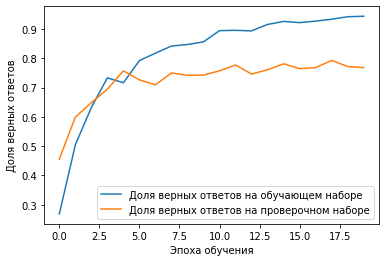

In [0]:
model = Sequential()
model.add(vgg19_my)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=30,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()

#Предыдущая модель + изменим steps до 100 (vgg 19 --- 80 %)

Epoch 1/20
  3/100 [..............................] - ETA: 2:18 - loss: 3.0170 - acc: 0.1731

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 118s 1s/step - loss: 1.4531 - acc: 0.5104 - val_loss: 1.2170 - val_acc: 0.6654
Epoch 2/20
100/100 [==============================] - 116s 1s/step - loss: 0.7012 - acc: 0.7892 - val_loss: 0.9881 - val_acc: 0.7022
Epoch 3/20
100/100 [==============================] - 114s 1s/step - loss: 0.4899 - acc: 0.8554 - val_loss: 1.0240 - val_acc: 0.7266
Epoch 4/20
100/100 [==============================] - 119s 1s/step - loss: 0.3601 - acc: 0.8911 - val_loss: 1.1222 - val_acc: 0.7904
Epoch 5/20
100/100 [==============================] - 118s 1s/step - loss: 0.2815 - acc: 0.9247 - val_loss: 1.2501 - val_acc: 0.7757
Epoch 6/20
100/100 [==============================] - 115s 1s/step - loss: 0.2266 - acc: 0.9315 - val_loss: 0.9327 - val_acc: 0.8047
Epoch 7/20
100/100 [==============================] - 114s 1s/step - loss: 0.1892 - acc: 0.9476 - val_loss: 1.0214 - val_acc: 0.7941
Epoch 8/20
100/100 [==============================] - 115s 1s/step - loss: 0.166

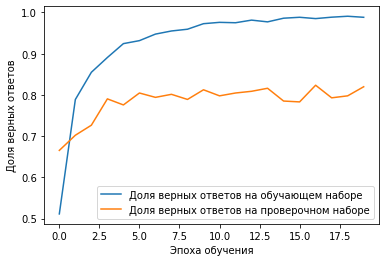

In [0]:
model = Sequential()
model.add(vgg19_my)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=100,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()

#Предыдущ, уменьшим дропаут до 0.3

Epoch 1/20
  1/100 [..............................] - ETA: 4:57 - loss: 2.6097 - acc: 0.1250

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 124s 1s/step - loss: 1.3197 - acc: 0.5502 - val_loss: 1.0892 - val_acc: 0.7059
Epoch 2/20
100/100 [==============================] - 119s 1s/step - loss: 0.5738 - acc: 0.8267 - val_loss: 1.0995 - val_acc: 0.7243
Epoch 3/20
100/100 [==============================] - 123s 1s/step - loss: 0.3615 - acc: 0.9037 - val_loss: 1.1269 - val_acc: 0.7617
Epoch 4/20
100/100 [==============================] - 114s 1s/step - loss: 0.2394 - acc: 0.9444 - val_loss: 1.2638 - val_acc: 0.7500
Epoch 5/20
100/100 [==============================] - 117s 1s/step - loss: 0.1917 - acc: 0.9540 - val_loss: 1.0923 - val_acc: 0.7978
Epoch 6/20
100/100 [==============================] - 121s 1s/step - loss: 0.1659 - acc: 0.9586 - val_loss: 1.2908 - val_acc: 0.7930
Epoch 7/20
100/100 [==============================] - 122s 1s/step - loss: 0.1298 - acc: 0.9719 - val_loss: 1.2260 - val_acc: 0.7904
Epoch 8/20
100/100 [==============================] - 116s 1s/step - loss: 0.104

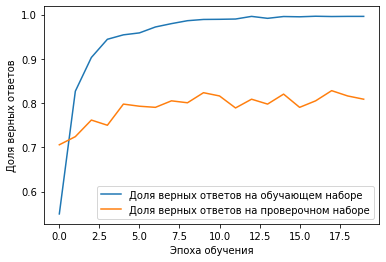

In [0]:
model = Sequential()
model.add(vgg19_my)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=100,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()

## PREDICT

In [0]:
files.upload()

Saving 34test.jpg to 34test (1).jpg


{'34test.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe1\x00hExif\x00\x00II*\x00\x08\x00\x00\x00\x03\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x001\x01\x02\x00\x10\x00\x00\x002\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00B\x00\x00\x00\x00\x00\x00\x00Shotwell 0.28.4\x00\x02\x00\x02\xa0\t\x00\x01\x00\x00\x00\xf6\x02\x00\x00\x03\xa0\t\x00\x01\x00\x00\x00\xf3\x02\x00\x00\x00\x00\x00\x00\xff\xe1\t\xf4http://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="XMP Core 4.4.0-Exiv2"> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:exif="http://ns.adobe.com/exif/1.0/" xmlns:tiff="http://ns.adobe.com/tiff/1.0/" exif:PixelXDimension="758" exif:PixelYDimension="755" tiff:ImageWidth="758" tiff:ImageHeight="755" tiff:Orientation="1"/> </rdf:RDF> </x:xmpmeta>                                                                        

In [0]:
!ls


'34test (1).jpg'   34test.jpg   drive1	 sample_data


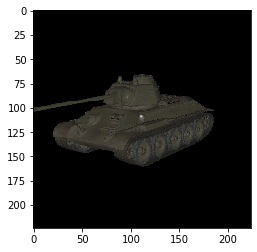

In [0]:
img_path = '34test (1).jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [0]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [0]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Распознанный образ: ", prediction)
print("Название распознанного образа: ", classes[prediction])

Распознанный образ:  1
Название распознанного образа:  T-34


## Новые 3 класса тест

Epoch 1/30
21/30 [====================>.........] - ETA: 57s - loss: 2.8358 - acc: 0.1116 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 227s 8s/step - loss: 2.7260 - acc: 0.1194 - val_loss: 2.0734 - val_acc: 0.1213
Epoch 2/30
30/30 [==============================] - 164s 5s/step - loss: 2.2915 - acc: 0.1302 - val_loss: 2.0783 - val_acc: 0.1360
Epoch 3/30
30/30 [==============================] - 27s 886ms/step - loss: 2.2402 - acc: 0.1464 - val_loss: 2.0712 - val_acc: 0.1523
Epoch 4/30
30/30 [==============================] - 26s 877ms/step - loss: 2.1394 - acc: 0.1490 - val_loss: 2.0707 - val_acc: 0.1875
Epoch 5/30
30/30 [==============================] - 27s 891ms/step - loss: 2.1033 - acc: 0.1531 - val_loss: 2.0708 - val_acc: 0.1213
Epoch 6/30
30/30 [==============================] - 28s 931ms/step - loss: 2.1356 - acc: 0.1422 - val_loss: 2.0687 - val_acc: 0.1523
Epoch 7/30
30/30 [==============================] - 27s 892ms/step - loss: 2.0859 - acc: 0.1615 - val_loss: 2.0654 - val_acc: 0.1654
Epoch 8/30
30/30 [==============================] - 26s 877ms/step - loss: 2.0825 - 

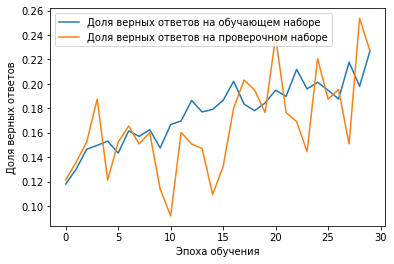

Точность при dense = 32 =  0.2265625
Epoch 1/30
24/30 [=======================>......] - ETA: 5s - loss: 3.1334 - acc: 0.1393

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 33s 1s/step - loss: 3.0437 - acc: 0.1385 - val_loss: 2.1172 - val_acc: 0.1213
Epoch 2/30
30/30 [==============================] - 28s 935ms/step - loss: 2.4577 - acc: 0.1470 - val_loss: 2.0866 - val_acc: 0.1471
Epoch 3/30
30/30 [==============================] - 26s 879ms/step - loss: 2.2578 - acc: 0.1621 - val_loss: 2.1173 - val_acc: 0.1523
Epoch 4/30
30/30 [==============================] - 25s 844ms/step - loss: 2.2022 - acc: 0.1698 - val_loss: 2.1012 - val_acc: 0.2022
Epoch 5/30
30/30 [==============================] - 28s 918ms/step - loss: 2.1704 - acc: 0.1564 - val_loss: 2.1349 - val_acc: 0.1213
Epoch 6/30
30/30 [==============================] - 27s 896ms/step - loss: 2.0972 - acc: 0.1625 - val_loss: 2.1209 - val_acc: 0.1289
Epoch 7/30
30/30 [==============================] - 26s 882ms/step - loss: 2.0624 - acc: 0.2073 - val_loss: 2.1410 - val_acc: 0.1618
Epoch 8/30
30/30 [==============================] - 27s 911ms/step - loss: 2.0950 -

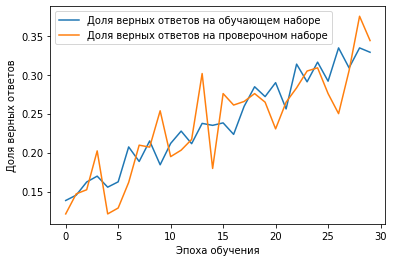

Точность при dense = 64 =  0.34375
Epoch 1/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 32s 1s/step - loss: 3.1088 - acc: 0.1423 - val_loss: 2.2351 - val_acc: 0.1654
Epoch 2/30
30/30 [==============================] - 27s 888ms/step - loss: 2.7232 - acc: 0.1677 - val_loss: 2.0519 - val_acc: 0.1949
Epoch 3/30
30/30 [==============================] - 26s 871ms/step - loss: 2.4166 - acc: 0.2038 - val_loss: 2.0537 - val_acc: 0.1992
Epoch 4/30
30/30 [==============================] - 28s 933ms/step - loss: 2.3606 - acc: 0.2135 - val_loss: 2.0880 - val_acc: 0.1728
Epoch 5/30
30/30 [==============================] - 26s 855ms/step - loss: 2.2253 - acc: 0.2142 - val_loss: 2.0419 - val_acc: 0.1728
Epoch 6/30
30/30 [==============================] - 27s 891ms/step - loss: 2.1584 - acc: 0.2434 - val_loss: 2.0317 - val_acc: 0.2422
Epoch 7/30
30/30 [==============================] - 29s 981ms/step - loss: 2.1071 - acc: 0.2521 - val_loss: 2.0135 - val_acc: 0.2574
Epoch 8/30
30/30 [==============================] - 26s 861ms/step - loss: 2.0925 -

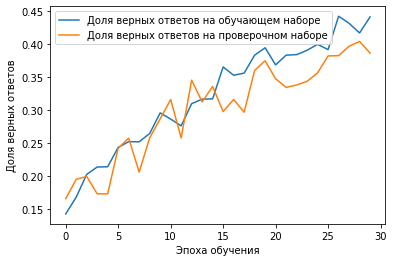

Точность при dense = 128 =  0.38671875


In [0]:
dropout = 0.5
denses = [32, 64, 128]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(112, 112, 3)))

  '''model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())'''

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(8, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

## Более сложная сеть Dense 128, 256, 8 классов

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
 8/30 [=======>......................] - ETA: 3:27 - loss: 3.3114 - acc: 0.1174

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 282s 9s/step - loss: 3.1922 - acc: 0.1251 - val_loss: 2.2992 - val_acc: 0.1324
Epoch 2/30
30/30 [==============================] - 192s 6s/step - loss: 2.6919 - acc: 0.1885 - val_loss: 2.1370 - val_acc: 0.1471
Epoch 3/30
30/30 [==============================] - 29s 971ms/step - loss: 2.5282 - acc: 0.1923 - val_loss: 2.1066 - val_acc: 0.1289
Epoch 4/30
30/30 [==============================] - 28s 932ms/step - loss: 2.3404 - acc: 0.2032 - val_loss: 2.0461 - val_acc: 0.1838
Epoch 5/30
30/30 [==============================] - 31s 1s/step - loss: 2.2499 - acc: 0.2083 - val_loss: 2.0522 - val_acc: 0.2096
Epoch 6/30
30/30 [==============================] - 31s 1s/step - loss: 2.2395 - acc: 0.2219 - val_loss: 2.0550 - val_acc: 0.1602
Epoch 7/30
30/30 [==============================] - 28s 945ms/step - loss: 2.1505 - acc: 0.2106 - val_loss: 2.0017 - val_acc: 0.2132
Epoch 8/30
30/30 [==============================] - 31s 1s/step - loss: 2.1777 - acc: 0.21

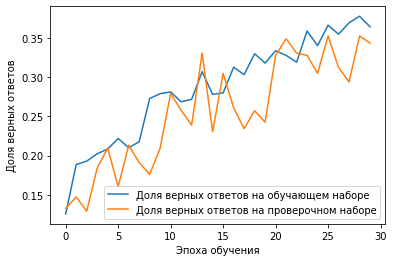

Точность при dense = 128 =  0.34375
Epoch 1/30
 3/30 [==>...........................] - ETA: 38s - loss: 3.3820 - acc: 0.1458

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 34s 1s/step - loss: 3.1273 - acc: 0.1563 - val_loss: 2.5250 - val_acc: 0.1912
Epoch 2/30
30/30 [==============================] - 30s 985ms/step - loss: 2.9053 - acc: 0.1678 - val_loss: 2.1606 - val_acc: 0.1691
Epoch 3/30
30/30 [==============================] - 31s 1s/step - loss: 2.4858 - acc: 0.2094 - val_loss: 2.1745 - val_acc: 0.1719
Epoch 4/30
30/30 [==============================] - 29s 967ms/step - loss: 2.3781 - acc: 0.2152 - val_loss: 2.1100 - val_acc: 0.2243
Epoch 5/30
30/30 [==============================] - 30s 986ms/step - loss: 2.2552 - acc: 0.2386 - val_loss: 2.1021 - val_acc: 0.2390
Epoch 6/30
30/30 [==============================] - 29s 962ms/step - loss: 2.0985 - acc: 0.2583 - val_loss: 2.0495 - val_acc: 0.2422
Epoch 7/30
30/30 [==============================] - 30s 1s/step - loss: 2.1122 - acc: 0.2708 - val_loss: 2.0882 - val_acc: 0.1765
Epoch 8/30
30/30 [==============================] - 30s 990ms/step - loss: 2.0608 - acc: 

In [0]:
dropout = 0.5
denses = [128, 256]
for dense in denses:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(112, 112, 3)))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(8, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=30,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense =', dense, '= ',history.history['val_acc'][-1])

#Дать больше денса для ВГГ19 (денсе 512)

Found 1557 images belonging to 8 classes.
Found 80 images belonging to 8 classes.
Epoch 1/10
14/30 [=============>................] - ETA: 30s - loss: 2.6662 - acc: 0.2366

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 50s 2s/step - loss: 2.1977 - acc: 0.2958 - val_loss: 1.8830 - val_acc: 0.3713
Epoch 2/10
30/30 [==============================] - 24s 810ms/step - loss: 1.3824 - acc: 0.5289 - val_loss: 1.6804 - val_acc: 0.4743
Epoch 3/10
30/30 [==============================] - 28s 940ms/step - loss: 1.1200 - acc: 0.6206 - val_loss: 1.4937 - val_acc: 0.5430
Epoch 4/10
30/30 [==============================] - 26s 855ms/step - loss: 0.9780 - acc: 0.6677 - val_loss: 1.5119 - val_acc: 0.5368
Epoch 5/10
30/30 [==============================] - 28s 926ms/step - loss: 0.9962 - acc: 0.6461 - val_loss: 1.7253 - val_acc: 0.4191
Epoch 6/10
30/30 [==============================] - 27s 911ms/step - loss: 0.8062 - acc: 0.7437 - val_loss: 1.5380 - val_acc: 0.5938
Epoch 7/10
30/30 [==============================] - 25s 850ms/step - loss: 0.7660 - acc: 0.7546 - val_loss: 1.6423 - val_acc: 0.5294
Epoch 8/10
30/30 [==============================] - 27s 910ms/step - loss: 0.7467 -

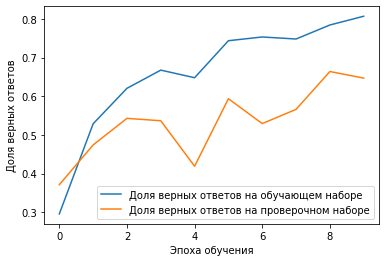

In [0]:
input_shape = (112, 112, 3)

vgg19_my = VGG19(weights='imagenet', 
                  include_top=False,
                  input_shape = input_shape)

vgg19_my.trainable = False
# Настройка test & train - генераторов для картинок
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Обучающая выборка 8ми классов
train_generator = train_datagen.flow_from_directory(
        '/content/drive1/My Drive/Neyro/Neyro/Kursovoi/3classesTest2/Train',
        target_size=(112, 112),
        batch_size=32,
        class_mode='categorical')

# Проверочная выборка 8ми классов
validation_generator = test_datagen.flow_from_directory(
        '/content/drive1/My Drive/Neyro/Neyro/Kursovoi/3classesTest2/Validation',
        target_size=(112, 112),
        batch_size=32,
        class_mode='categorical')


dense = 512
model = Sequential()
model.add(vgg19_my)
model.add(Flatten())
model.add(Dense(dense, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam", 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=30,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()

#Dense 1024 VGG19

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 49s 2s/step - loss: 2.1618 - acc: 0.3507 - val_loss: 1.7250 - val_acc: 0.3897
Epoch 2/10
30/30 [==============================] - 25s 819ms/step - loss: 1.3121 - acc: 0.5323 - val_loss: 1.7028 - val_acc: 0.4522
Epoch 3/10
30/30 [==============================] - 26s 876ms/step - loss: 1.0873 - acc: 0.6363 - val_loss: 1.4301 - val_acc: 0.5000
Epoch 4/10
30/30 [==============================] - 27s 884ms/step - loss: 0.9211 - acc: 0.6696 - val_loss: 1.4240 - val_acc: 0.5662
Epoch 5/10
30/30 [==============================] - 27s 886ms/step - loss: 0.9347 - acc: 0.6951 - val_loss: 1.5297 - val_acc: 0.4632
Epoch 6/10
30/30 [==============================] - 28s 924ms/step - loss: 0.7390 - acc: 0.7448 - val_loss: 1.3915 - val_acc: 0.6016
Epoch 7/10
30/30 [==============================] - 26s 879ms/step - loss: 0.6602 - acc: 0.7885 - val_loss: 1.6405 - val_acc: 0.5588
Epoch 8/10
30/30 [==============================] - 27s 906ms/step - loss: 0.6115 -

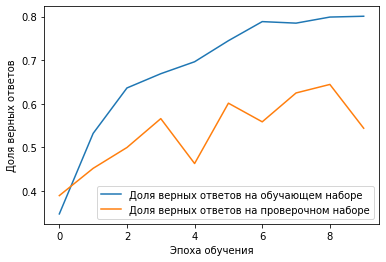

In [0]:
dense = 1024
model = Sequential()
model.add(vgg19_my)
model.add(Flatten())
model.add(Dense(dense, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam", 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=30,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()

#ВГГ19 степс пер эпох больше

Epoch 1/10
 17/100 [====>.........................] - ETA: 2:29 - loss: 3.4918 - acc: 0.2243

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 107s 1s/step - loss: 1.6766 - acc: 0.4856 - val_loss: 1.3299 - val_acc: 0.5184
Epoch 2/10
100/100 [==============================] - 81s 811ms/step - loss: 0.7735 - acc: 0.7417 - val_loss: 1.5157 - val_acc: 0.5368
Epoch 3/10
100/100 [==============================] - 85s 853ms/step - loss: 0.6198 - acc: 0.7936 - val_loss: 1.5278 - val_acc: 0.5547
Epoch 4/10
100/100 [==============================] - 83s 831ms/step - loss: 0.5294 - acc: 0.8187 - val_loss: 1.5515 - val_acc: 0.6654
Epoch 5/10
100/100 [==============================] - 84s 845ms/step - loss: 0.3944 - acc: 0.8725 - val_loss: 2.1101 - val_acc: 0.5441
Epoch 6/10
100/100 [==============================] - 84s 840ms/step - loss: 0.3482 - acc: 0.8792 - val_loss: 1.5849 - val_acc: 0.6250
Epoch 7/10
100/100 [==============================] - 81s 812ms/step - loss: 0.3123 - acc: 0.8948 - val_loss: 1.9676 - val_acc: 0.6213
Epoch 8/10
100/100 [==============================] - 84s 841ms/step

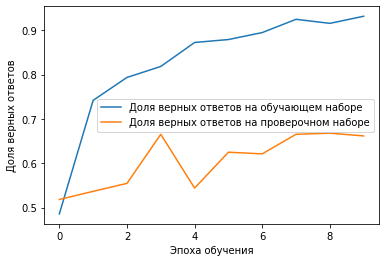

In [0]:
dense = 1024
model = Sequential()
model.add(vgg19_my)
model.add(Flatten())
model.add(Dense(dense, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam", 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=100,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()

#NASNetMobile 224*224 8 classes

In [0]:
# Rescale/нормализация картинок 3х категорий
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Обучающая выборка 3х классов

train_generator = train_datagen.flow_from_directory(
        '/content/drive1/My Drive/Neyro/Neyro/Kursovoi/3classesTest2/Train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

# Проверочная выборка 3х классов

validation_generator = test_datagen.flow_from_directory(
        '/content/drive1/My Drive/Neyro/Neyro/Kursovoi/3classesTest2/Validation',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 1557 images belonging to 8 classes.
Found 80 images belonging to 8 classes.


#NasnetMobile

In [0]:
input_shape = (224, 224, 3)

NASNetMobile_my = NASNetMobile(weights='imagenet', 
                  include_top=False,
                  input_shape = input_shape)
NASNetMobile_my.trainable = False

'''model = Sequential()
model.add(NASNetMobile_my)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=30,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()'''

model = Sequential()
model.add(NASNetMobile_my)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=100,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 132s 1s/step - loss: 1.8286 - acc: 0.4686 - val_loss: 1.7348 - val_acc: 0.4743
Epoch 2/20
100/100 [==============================] - 102s 1s/step - loss: 0.8185 - acc: 0.7194 - val_loss: 2.1420 - val_acc: 0.4559
Epoch 3/20
100/100 [==============================] - 107s 1s/step - loss: 0.6098 - acc: 0.7900 - val_loss: 2.3464 - val_acc: 0.5117
Epoch 4/20
100/100 [==============================] - 108s 1s/step - loss: 0.5011 - acc: 0.8298 - val_loss: 2.2329 - val_acc: 0.4926
Epoch 5/20
100/100 [==============================] - 109s 1s/step - loss: 0.4251 - acc: 0.8592 - val_loss: 2.0456 - val_acc: 0.5699
Epoch 6/20
100/100 [==============================] - 107s 1s/step - loss: 0.3414 - acc: 0.8861 - val_loss: 2.2757 - val_acc: 0.5039
Epoch 7/20
100/100 [==============================] - 106s 1s/step - loss: 0.3168 - acc: 0.8928 - val_loss: 2.0908 - val_acc: 0.5404
Epoch 8/20
100/100 [==============================] - 109s 1s/step - loss: 0.260

#Resnet50 224*224

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 146s 1s/step - loss: 0.9322 - acc: 0.7952 - val_loss: 1.6657 - val_acc: 0.8456
Epoch 2/20
100/100 [==============================] - 123s 1s/step - loss: 0.1107 - acc: 0.9678 - val_loss: 1.7318 - val_acc: 0.8088
Epoch 3/20
100/100 [==============================] - 124s 1s/step - loss: 0.0906 - acc: 0.9744 - val_loss: 2.2556 - val_acc: 0.7578
Epoch 4/20
100/100 [==============================] - 125s 1s/step - loss: 0.0766 - acc: 0.9790 - val_loss: 2.6760 - val_acc: 0.7978
Epoch 5/20
100/100 [==============================] - 129s 1s/step - loss: 0.0490 - acc: 0.9862 - val_loss: 2.3466 - val_acc: 0.8051
Epoch 6/20
100/100 [==============================] - 125s 1s/step - loss: 0.0799 - acc: 0.9795 - val_loss: 1.1226 - val_acc: 0.8320
Epoch 7/20
100/100 [==============================] - 125s 1s/step - loss: 0.0342 - acc: 0.9911 - val_loss: 1.9911 - val_acc: 0.8346
Epoch 8/20
100/100 [==============================] - 127s 1s/step - loss: 0.025

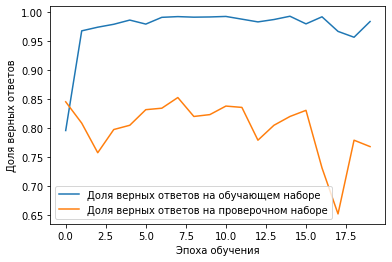

In [0]:
input_shape = (224, 224, 3)
resnet50_my = ResNet50(weights='imagenet', 
                  include_top=False,
                  input_shape = input_shape)
model = Sequential()
model.add(resnet50_my)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=100,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)
plotAny()



#VGG 19 224*224

In [0]:
input_shape = (224, 224, 3)
vgg19_my = VGG19(weights='imagenet', 
                  include_top=False,
                  input_shape = input_shape)
vgg19_my.trainable = False

model = Sequential()
model.add(vgg19_my)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam", 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=30,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=1)


Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 49s 2s/step - loss: 6.9228 - acc: 0.3262 - val_loss: 6.9033 - val_acc: 0.2794
Epoch 2/10
30/30 [==============================] - 32s 1s/step - loss: 6.5203 - acc: 0.4750 - val_loss: 6.4500 - val_acc: 0.5147
Epoch 3/10
30/30 [==============================] - 33s 1s/step - loss: 6.4184 - acc: 0.5242 - val_loss: 6.2869 - val_acc: 0.5195
Epoch 4/10
30/30 [==============================] - 33s 1s/step - loss: 6.0764 - acc: 0.5878 - val_loss: 6.4382 - val_acc: 0.5368
Epoch 5/10
30/30 [==============================] - 34s 1s/step - loss: 6.1182 - acc: 0.5552 - val_loss: 6.4121 - val_acc: 0.4485
Epoch 6/10
30/30 [==============================] - 33s 1s/step - loss: 6.2832 - acc: 0.5727 - val_loss: 6.3634 - val_acc: 0.5273
Epoch 7/10
30/30 [==============================] - 33s 1s/step - loss: 6.0750 - acc: 0.5977 - val_loss: 6.5796 - val_acc: 0.5184
Epoch 8/10
30/30 [==============================] - 35s 1s/step - loss: 5.9249 - acc: 0.5938 - val_lo

#Resnet50 224*224

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 83s 3s/step - loss: 1.5332 - acc: 0.6323 - val_loss: 1.9679 - val_acc: 0.7113
Epoch 2/10
30/30 [==============================] - 52s 2s/step - loss: 0.3946 - acc: 0.8833 - val_loss: 2.4648 - val_acc: 0.7146
Epoch 3/10
30/30 [==============================] - 49s 2s/step - loss: 0.1245 - acc: 0.9557 - val_loss: 2.0215 - val_acc: 0.8261
Epoch 4/10
30/30 [==============================] - 55s 2s/step - loss: 0.0655 - acc: 0.9802 - val_loss: 2.1307 - val_acc: 0.8244
Epoch 5/10
30/30 [==============================] - 51s 2s/step - loss: 0.0735 - acc: 0.9750 - val_loss: 2.4580 - val_acc: 0.8005
Epoch 6/10
30/30 [==============================] - 51s 2s/step - loss: 0.0668 - acc: 0.9781 - val_loss: 2.3549 - val_acc: 0.8005
Epoch 7/10
30/30 [==============================] - 52s 2s/step - loss: 0.0509 - acc: 0.9802 - val_loss: 2.0995 - val_acc: 0.8371
Epoch 8/10
30/30 [==============================] - 47s 2s/step - loss: 0.0841 - acc: 0.9760 - val_lo

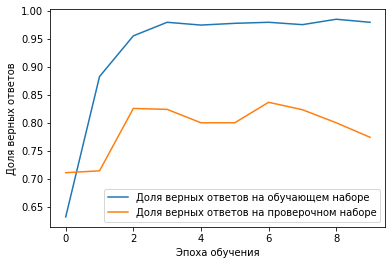

In [0]:
input_shape = (224, 224, 3)
resnet50_my = ResNet50(weights='imagenet', 
                  include_top=False,
                  input_shape = input_shape)

model = Sequential()
model.add(resnet50_my)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=30,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=50,
        verbose=1)
plotAny()

#По графику выше видно что наступило переобучение, увеличим дропаут до 0.4 Resnet

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 85s 3s/step - loss: 1.9282 - acc: 0.5456 - val_loss: 1.3827 - val_acc: 0.7240
Epoch 2/10
30/30 [==============================] - 51s 2s/step - loss: 0.5065 - acc: 0.8353 - val_loss: 2.2064 - val_acc: 0.7741
Epoch 3/10
30/30 [==============================] - 50s 2s/step - loss: 0.1649 - acc: 0.9448 - val_loss: 2.2715 - val_acc: 0.7892
Epoch 4/10
30/30 [==============================] - 54s 2s/step - loss: 0.1055 - acc: 0.9708 - val_loss: 2.1589 - val_acc: 0.8244
Epoch 5/10
30/30 [==============================] - 53s 2s/step - loss: 0.0843 - acc: 0.9745 - val_loss: 2.3319 - val_acc: 0.8117
Epoch 6/10
30/30 [==============================] - 51s 2s/step - loss: 0.0986 - acc: 0.9672 - val_loss: 2.1020 - val_acc: 0.8012
Epoch 7/10
30/30 [==============================] - 51s 2s/step - loss: 0.1011 - acc: 0.9651 - val_loss: 2.2484 - val_acc: 0.8118
Epoch 8/10
30/30 [==============================] - 48s 2s/step - loss: 0.0835 - acc: 0.9781 - val_lo

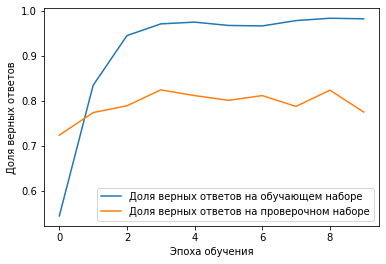

In [0]:
input_shape = (224, 224, 3)
resnet50_my = ResNet50(weights='imagenet', 
                  include_top=False,
                  input_shape = input_shape)

model = Sequential()
model.add(resnet50_my)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=30,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=50,
        verbose=1)
plotAny()

# Dropout = 0.5 RESNET

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Epoch 1/10
23/30 [======================>.......] - ETA: 14s - loss: 2.6949 - acc: 0.4019

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 88s 3s/step - loss: 2.3385 - acc: 0.4529 - val_loss: 1.0911 - val_acc: 0.6615
Epoch 2/10
30/30 [==============================] - 50s 2s/step - loss: 0.6451 - acc: 0.7890 - val_loss: 1.4900 - val_acc: 0.7658
Epoch 3/10
30/30 [==============================] - 51s 2s/step - loss: 0.3362 - acc: 0.8906 - val_loss: 1.6634 - val_acc: 0.7982
Epoch 4/10
30/30 [==============================] - 55s 2s/step - loss: 0.1793 - acc: 0.9416 - val_loss: 1.9233 - val_acc: 0.7865
Epoch 5/10
30/30 [==============================] - 51s 2s/step - loss: 0.1350 - acc: 0.9583 - val_loss: 1.7470 - val_acc: 0.8268
Epoch 6/10
30/30 [==============================] - 51s 2s/step - loss: 0.1153 - acc: 0.9672 - val_loss: 1.8166 - val_acc: 0.8102
Epoch 7/10
30/30 [==============================] - 52s 2s/step - loss: 0.0780 - acc: 0.9739 - val_loss: 1.6216 - val_acc: 0.7865
Epoch 8/10
30/30 [==============================] - 48s 2s/step - loss: 0.0789 - acc: 0.9781 - val_lo

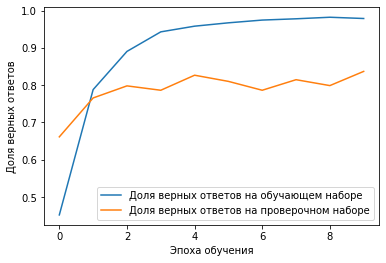

In [0]:
input_shape = (224, 224, 3)
resnet50_my = ResNet50(weights='imagenet', 
                  include_top=False,
                  input_shape = input_shape)

model = Sequential()
model.add(resnet50_my)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

history = model.fit(train_generator,
        steps_per_epoch=30,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=50,
        verbose=1)
plotAny()